# Exploratory Data Analysis on Haberman's Dataset


## About Haberman's dataset
### References:

https://www.kaggle.com/gilsousa/habermans-survival-data-set

https://github.com/Kurian-lalan/EDA-on-haberman-survival-dataset/blob/master/EDA_Assignment.ipynb

### Information about dataset :
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

### Attribute Information :
Age of patient at time of operation (numerical)
Patient's year of operation (year - 1900, numerical)
Number of positive axillary nodes detected (numerical)
Survival status (class attribute): 
    1 = the patient survived 5 years or longer 
    2 = the patient died within 5 year

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import data as csv file and put it into dataframe
haberman = pd.read_csv('haberman.csv')

In [3]:
print('Column names:')
print(haberman.columns)

Column names:
Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [4]:
print('Some of the datapoints are:')
print(haberman.head(10))
print(haberman.tail(10))

Some of the datapoints are:
   age  year  nodes  status
0   30    64      1       1
1   30    62      3       1
2   30    65      0       1
3   31    59      2       1
4   31    65      4       1
5   33    58     10       1
6   33    60      0       1
7   34    59      0       2
8   34    66      9       2
9   34    58     30       1
     age  year  nodes  status
296   72    67      3       1
297   73    62      0       1
298   73    68      0       1
299   74    65      3       2
300   74    63      0       1
301   75    62      1       1
302   76    67      0       1
303   77    65      3       1
304   78    65      1       2
305   83    58      2       2


In [5]:
print("The number of data points and features respectievely:" , haberman.shape)
print("\n")
print("Data points per class:") 
print(haberman['status'].value_counts())

The number of data points and features respectievely: (306, 4)


Data points per class:
1    225
2     81
Name: status, dtype: int64


### Observations:
1. As per the dataset, 'status' is the class label which can take 2 values; 1 and 2. Status 1 represents the patients who survived more than 5 years after the surgery and status 2 represents the patients who survived less than 5 years after the surgery.

2. There are 225 datapoints for class 1 and 81 datapoints for class 2. Since there is substantial difference in the count, we can infer that it is an imbalanced dataset.

## Objective:
The objective of Haberman's dataset analysis is to predict whether the patient will survive more than 5 years or not given the patient’s age, year of treatment and the number of positive auxillary lymph nodes.

In [6]:
hb_survived = haberman.loc[haberman['status'] == 1]
hb_died = haberman.loc[haberman['status'] == 2]

print('Basic statistics about patients who survived 5 years or longer after operation:\n')
print(hb_survived.describe())

print('\n\nBasic statistics about patients who died within 5 years after operation:\n')
print(hb_died.describe())

Basic statistics about patients who survived 5 years or longer after operation:

              age        year       nodes  status
count  225.000000  225.000000  225.000000   225.0
mean    52.017778   62.862222    2.791111     1.0
std     11.012154    3.222915    5.870318     0.0
min     30.000000   58.000000    0.000000     1.0
25%     43.000000   60.000000    0.000000     1.0
50%     52.000000   63.000000    0.000000     1.0
75%     60.000000   66.000000    3.000000     1.0
max     77.000000   69.000000   46.000000     1.0


Basic statistics about patients who died within 5 years after operation:

             age       year      nodes  status
count  81.000000  81.000000  81.000000    81.0
mean   53.679012  62.827160   7.456790     2.0
std    10.167137   3.342118   9.185654     0.0
min    34.000000  58.000000   0.000000     2.0
25%    46.000000  59.000000   1.000000     2.0
50%    53.000000  63.000000   4.000000     2.0
75%    61.000000  65.000000  11.000000     2.0
max    83.000000 

#### Observations based on the basic statistics:
1. The statistics for age and year are more or less similar for both the survival statuses. But we can see notable difference in number of nodes for status 1 and 2.

2. For the patients who survived more than 5 years, 75% patients are having nodes less than or equal to 3. On the other hand, 25% of the patients of class 2 have number of nodes less than or equal to 1 but still they didn't survive more than 5 years. 

## Univariate Analysis

### (1) Based on age of the patient

#### 1. Histogram with PDF

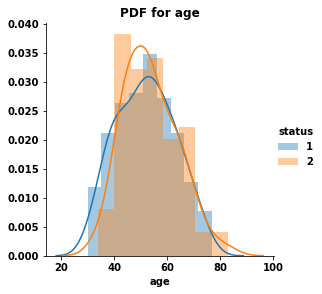

In [7]:
plt.close()
sns.FacetGrid(haberman, hue = 'status', height = 4).map(sns.distplot, 'age').add_legend()
plt.title('PDF for age')
plt.show()

#### 2. Boxplot and Violin plot

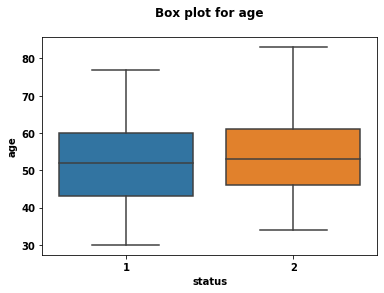

In [8]:
sns.boxplot(x='status', y='age', data= haberman)
plt.title('Box plot for age\n')
plt.show()

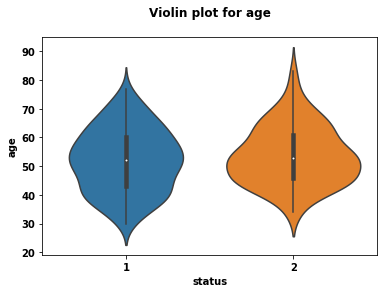

In [9]:
sns.violinplot(x='status', y='age', data= haberman)
plt.title('Violin plot for age\n')
plt.show()

#### Observations:
1. There is a huge overlap between pdfs of class 1 and 2 considering age as the parameter. 
2. The plots are very similar for both the classes.
3. Thus, age alone can't decide the survival status.

### (2) Based on year of operation

#### 1. Histogram with PDF

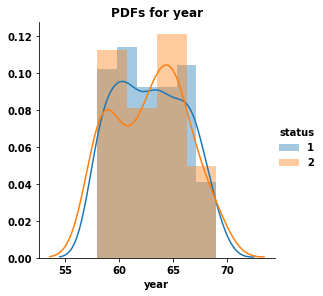

In [10]:
plt.close()
sns.FacetGrid(haberman, hue = 'status', height = 4).map(sns.distplot, 'year').add_legend()
plt.title('PDFs for year')
plt.show()

#### 2. Boxplot and Violin plot

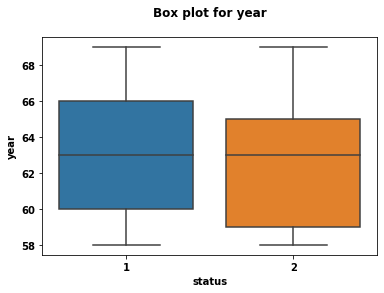

In [11]:
sns.boxplot(x='status', y='year', data= haberman)
plt.title('Box plot for year\n')
plt.show()

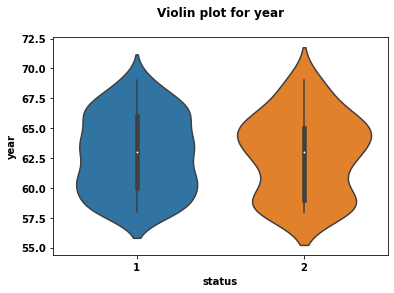

In [12]:
sns.violinplot(x='status', y='year', data= haberman)
plt.title('Violin plot for year\n')
plt.show()

#### Observations:
1. There is a huge overlap between pdfs of class 1 and 2 considering year as the parameter.
3. Thus, year alone can't decide the survival status.

### (3) Based on number of positive lymph nodes

#### 1. Histogram with PDF

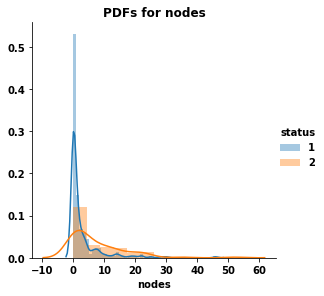

In [13]:
plt.close()
sns.FacetGrid(haberman, hue = 'status', height = 4).map(sns.distplot, 'nodes').add_legend()
plt.title('PDFs for nodes')
plt.show()

#### 2. Boxplot and Violin plot

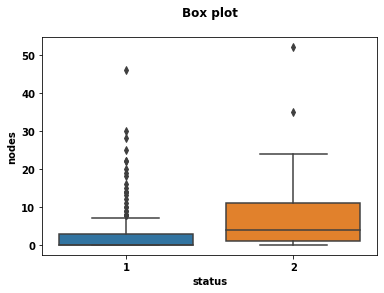

In [14]:
sns.boxplot(x='status', y='nodes', data= haberman)
plt.title('Box plot\n')
plt.show()

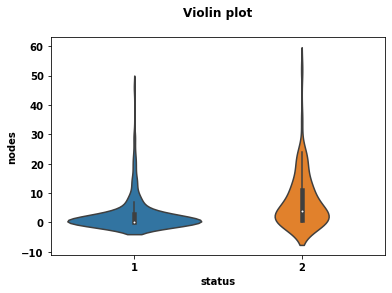

In [15]:
sns.violinplot(x='status', y='nodes', data= haberman)
plt.title('Violin plot\n')
plt.show()

#### Observations:
1. Even though there is overlap between 2 classes while ploting based on nodes, the overlap is less compared to other features.
2. Large number of patients with 0 nodes have survived more than 5 years 
3. As number of positive axillary nodes increase the chance of survival decreases

### Plotting cdf and pdf considering nodes as the parameter for more quantitative analysis

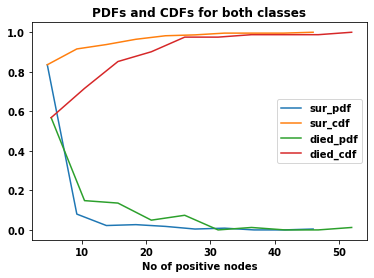

In [16]:
counts, bin_edges = np.histogram(hb_survived['nodes'], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)


counts, bin_edges = np.histogram(hb_died['nodes'], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:] ,cdf)
plt.legend(['sur_pdf', 'sur_cdf','died_pdf', 'died_cdf'])
plt.xlabel('No of positive nodes')
plt.title('PDFs and CDFs for both classes')
plt.show()

#### Observations:
1. 83% of survived patients  have 0 positive nodes. But 55% of died patients also have 0 positive nodes.
2. Thus, thus absence of positive axillary nodes cannot always guarente survival.

## Bivariate analysis

### Pair plot

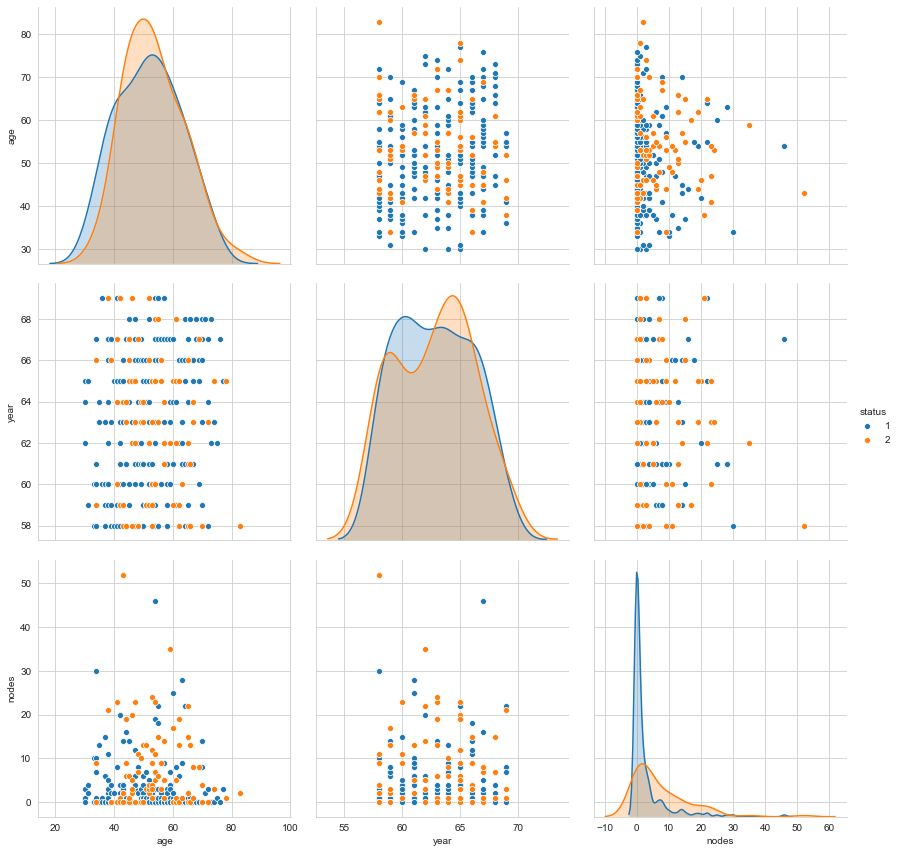

In [17]:
plt.close()
sns.set_style('whitegrid')
sns.pairplot(haberman, hue = 'status', height = 4, vars = ['age', 'year', 'nodes'])
plt.show()

#### Observations:
1. We can say that the chances of survival for a patient are more in case age is less than 40 years and number of positive nodes are less than 20.
2. In general, it is difficult to classify a patient considering only the given features

## Conclusions:
1. As the number of positive auxillary nodes increase the chance of survival of patient decreases; but at the same time, having zero postivie axillary nodes does not guarentee survival as there are cases where patients with zero positive axillary nodes could not survive 5 years from the time of operation.

2. Even if we could come up with a simple model which could predict the survival of a patient based on the insights we got, the chance of misclassification is high.

3. The objective of classifying the survival status of a new patient based on given features is a difficult task.